# Task
Deduce the Linear Regression model in the form of Normal Equation for two parameter predictors and then proceed to solve the following assignments.
2. The following table shows the final semester marks obtained by 10 students selected at random.
M L 89 95 96 69 87 70 98 69 85 87
Robotics 81 86 98 72 93 82 96 75 89 84
Find least square line fitting the above data using
a) X as independent variables (regression of Y on X)
b) Y as independent variable (regression of X on Y)
c) If a student receives a mark 96 in ML, what is her/his expected marks in HUR.
d) If a student receives 95 in HUR. What is her/his expected marks in ML.
e) After plotting a) and b) what conclusions can you draw?
Present only the code.

In [2]:
ml_marks = [89, 95, 96, 69, 87, 70, 98, 69, 85, 87]
robotics_marks = [81, 86, 98, 72, 93, 82, 96, 75, 89, 84]
print("ML Marks:", ml_marks)
print("Robotics Marks:", robotics_marks)

ML Marks: [89, 95, 96, 69, 87, 70, 98, 69, 85, 87]
Robotics Marks: [81, 86, 98, 72, 93, 82, 96, 75, 89, 84]


In [3]:
import numpy as np

Y = np.array(robotics_marks).reshape(-1, 1)
X = np.array(ml_marks)
X = np.vstack([np.ones(len(X)), X]).T

X_transpose = X.T
XTX = X_transpose @ X
XTX_inv = np.linalg.inv(XTX)
XTY = X_transpose @ Y
beta = XTX_inv @ XTY

print("Regression coefficients (beta):")
print(beta)


Regression coefficients (beta):
[[33.36229865]
 [ 0.61819765]]


In [8]:
X_ml = np.array(ml_marks).reshape(-1, 1)
Y_robotics = np.array(robotics_marks)

X_design_robotics = np.vstack([np.ones(len(Y_robotics)), Y_robotics]).T
X_design_robotics_transpose = X_design_robotics.T
XTX_robotics = X_design_robotics_transpose @ X_design_robotics
XTX_robotics_inv = np.linalg.inv(XTX_robotics)
XTY_robotics = X_design_robotics_transpose @ X_ml
beta_x_on_y = XTX_robotics_inv @ XTY_robotics

print("Regression coefficients (beta for X on Y):")
print(beta_x_on_y)


Regression coefficients (beta for X on Y):
[[-7.25120773]
 [ 1.0718599 ]]


In [5]:
beta_0 = beta[0][0]
beta_1 = beta[1][0]

ml_mark_given = 96
predicted_robotics_mark = beta_0 + beta_1 * ml_mark_given

print(f"The expected Robotics mark for a student with an ML mark of {ml_mark_given} is: {predicted_robotics_mark:.2f}")


The expected Robotics mark for a student with an ML mark of 96 is: 92.71


In [9]:
beta_0_x_on_y = beta_x_on_y[0][0]
beta_1_x_on_y = beta_x_on_y[1][0]

robotics_mark_given = 95
predicted_ml_mark = beta_0_x_on_y + beta_1_x_on_y * robotics_mark_given

print(f"The expected ML mark for a student with a Robotics mark of {robotics_mark_given} is: {predicted_ml_mark:.2f}")


The expected ML mark for a student with a Robotics mark of 95 is: 94.58


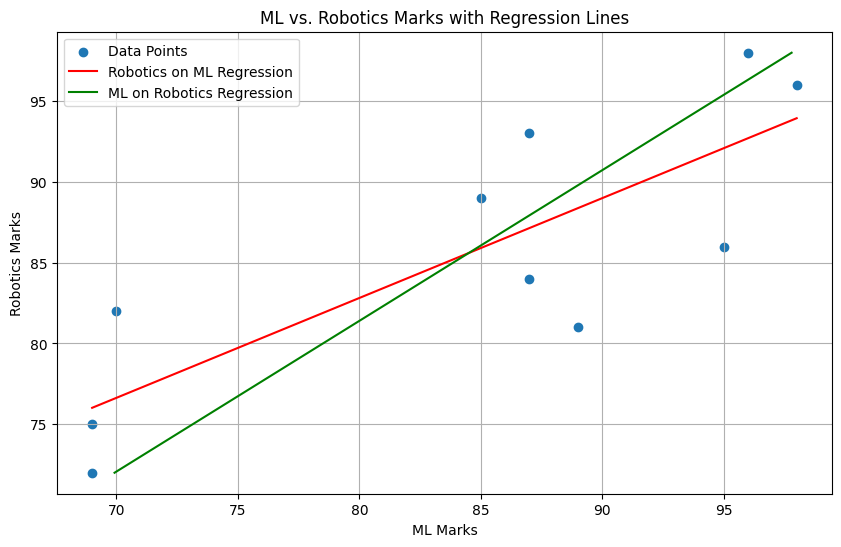

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.scatter(ml_marks, robotics_marks, label='Data Points')

x_values = np.array([min(ml_marks), max(ml_marks)])
y_predicted_on_x = beta_0 + beta_1 * x_values
plt.plot(x_values, y_predicted_on_x, color='red', label='Robotics on ML Regression')

y_values = np.array([min(robotics_marks), max(robotics_marks)])
x_predicted_on_y = beta_0_x_on_y + beta_1_x_on_y * y_values
plt.plot(x_predicted_on_y, y_values, color='green', label='ML on Robotics Regression')

plt.xlabel('ML Marks')
plt.ylabel('Robotics Marks')
plt.title('ML vs. Robotics Marks with Regression Lines')
plt.legend()
plt.grid(True)
plt.show()
